In [6]:
import pyabc
from pyabc import ABCSMC
from slad import *
import sklearn.gaussian_process as skl_gp
import logging

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)

problem = PrangleGKProblem()

distances = [
    pyabc.PNormDistance(),
    pyabc.AdaptivePNormDistance(n_fit_scales=1, scale_function=pyabc.distance.root_mean_square_deviation),
    pyabc.AdaptivePNormDistance(n_fit_scales=np.inf, scale_function=pyabc.distance.root_mean_square_deviation),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=False, normalize_labels=False)),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=True)),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=True, n_fit=4), n_fit_scales=np.inf),
    pyabc.PNormDistance(sumstat=pyabc.GPPredictorSumstat(kernel=pyabc.GPKernelHandle(kernels=['RBF', 'WhiteKernel'], ard=True), n_restarts_optimizer=5)),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.GPPredictorSumstat(kernel=pyabc.GPKernelHandle(kernels=['RBF', 'WhiteKernel'], ard=True), n_restarts_optimizer=5)),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.GPPredictorSumstat(kernel=pyabc.GPKernelHandle(kernels=['RBF', 'WhiteKernel'], ard=True), n_restarts_optimizer=5, n_fit=4)),
    #pyabc.AdaptivePNormDistance(sumstat=pyabc.GPPredictorSumstat(kernel=pyabc.GPKernelHandle(kernels=['RBF', 'WhiteKernel'], ard=True), n_fit=4, joint=False)),
    #pyabc.AdaptivePNormDistance(sumstat=pyabc.GPPredictorSumstat(kernel=pyabc.GPKernelHandle(kernels=['Matern', 'WhiteKernel'], ard=True), n_fit=4)),
    pyabc.PNormDistance(sumstat=pyabc.MLPPredictorSumstat()),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.MLPPredictorSumstat(n_fit=4)),
    pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(
        predictor=pyabc.ModelSelectionPredictor(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit=1,
    )),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.PredictorSumstat(
        predictor=pyabc.ModelSelectionPredictor(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit=4,
    )),
    pyabc.distance.InfoWeightedPNormDistance(predictor=pyabc.ModelSelectionPredictor(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit_info=4,
    ),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear nn',
    'Learned linear tt',
    'Adaptive LL tn n_fit=4',
    'GP',
    'Adaptive GP',
    'Adaptive GP n_fit=4',
    'MLP',
    'Adaptive MLP n_fit=4',
    'MS',
    'Adaptive MS n_fit=4',
    'Adaptive Info MS n_fit=4',
]

assert len(distances) == len(labels)

In [7]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(problem.get_model(), problem.get_prior(), distance, population_size=1000)
    abc.new(pyabc.create_sqlite_db_id(), problem.get_obs())
    h = abc.run(max_total_nr_simulations=50e3)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=209, start_time=2021-04-18 21:56:43.478175>
INFO:ABC:Calibration sample t=-1.


Euclidean


INFO:Epsilon:initial epsilon is 605.600928643266
INFO:ABC:t: 0, eps: 605.600928643266.
INFO:ABC:Acceptance rate: 1000 / 1942 = 5.1493e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 65.38012793516265.
INFO:ABC:Acceptance rate: 1000 / 2224 = 4.4964e-01, ESS=7.4600e+02.
INFO:ABC:t: 2, eps: 23.606017042002673.
INFO:ABC:Acceptance rate: 1000 / 2213 = 4.5188e-01, ESS=6.2550e+02.
INFO:ABC:t: 3, eps: 13.797377131897456.
INFO:ABC:Acceptance rate: 1000 / 2279 = 4.3879e-01, ESS=7.8513e+02.
INFO:ABC:t: 4, eps: 7.990316567361849.
INFO:ABC:Acceptance rate: 1000 / 2156 = 4.6382e-01, ESS=4.7698e+02.
INFO:ABC:t: 5, eps: 5.222824572242763.
INFO:ABC:Acceptance rate: 1000 / 2110 = 4.7393e-01, ESS=7.6446e+02.
INFO:ABC:t: 6, eps: 3.484626474455545.
INFO:ABC:Acceptance rate: 1000 / 2220 = 4.5045e-01, ESS=8.0140e+02.
INFO:ABC:t: 7, eps: 2.4395678769370774.
INFO:ABC:Acceptance rate: 1000 / 2135 = 4.6838e-01, ESS=8.3492e+02.
INFO:ABC:t: 8, eps: 1.7907164452321949.
INFO:ABC:Acceptance rate: 1000 / 2362 = 4.2337e-01, E

Calibrated Euclidean


DEBUG:Distance:Scale weights[0] = {'y::0': 0.00042163357060778946, 'y::1': 0.042720287797177244, 'y::2': 0.31306913351212085, 'y::3': 0.2951618931574365, 'y::4': 0.14770985894609398, 'y::5': 0.009662312296705357, 'y::6': 7.921014175395957e-05}
INFO:Epsilon:initial epsilon is 1.7452635069058962
INFO:ABC:t: 0, eps: 1.7452635069058962.
INFO:ABC:Acceptance rate: 1000 / 2017 = 4.9579e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 1.0726906124002131.
INFO:ABC:Acceptance rate: 1000 / 1980 = 5.0505e-01, ESS=8.9484e+02.
INFO:ABC:t: 2, eps: 0.7224141341495716.
INFO:ABC:Acceptance rate: 1000 / 2166 = 4.6168e-01, ESS=8.3979e+02.
INFO:ABC:t: 3, eps: 0.489130292920639.
INFO:ABC:Acceptance rate: 1000 / 2096 = 4.7710e-01, ESS=8.2740e+02.
INFO:ABC:t: 4, eps: 0.33890256425033866.
INFO:ABC:Acceptance rate: 1000 / 2147 = 4.6577e-01, ESS=8.5804e+02.
INFO:ABC:t: 5, eps: 0.228203563310178.
INFO:ABC:Acceptance rate: 1000 / 2226 = 4.4924e-01, ESS=8.4308e+02.
INFO:ABC:t: 6, eps: 0.151639481441774.
INFO:ABC:Acceptance

Adaptive Euclidean


DEBUG:Distance:Scale weights[0] = {'y::0': 0.0004191872455458849, 'y::1': 0.04513602541278697, 'y::2': 0.30642431010275456, 'y::3': 0.2829729962443317, 'y::4': 0.14891036319208792, 'y::5': 0.010261219992542255, 'y::6': 8.180808712534296e-05}
INFO:Epsilon:initial epsilon is 1.7347448735780444
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.7347448735780444.
INFO:ABC:Acceptance rate: 1000 / 2072 = 4.8263e-01, ESS=1.0000e+03.
DEBUG:Distance:Scale weights[1] = {'y::0': 0.00037551129630236234, 'y::1': 0.04190101638454265, 'y::2': 0.3165879507162895, 'y::3': 0.2890535870616687, 'y::4': 0.14457021658425082, 'y::5': 0.00982354490851543, 'y::6': 7.832187657186361e-05}
INFO:ABC:t: 1, eps: 1.0294230766515118.
INFO:ABC:Acceptance rate: 1000 / 1995 = 5.0125e-01, ESS=8.3922e+02.
DEBUG:Distance:Scale weights[2] = {'y::0': 0.002700355128628729, 'y::1': 0.14443970461530145, 'y::2': 0.4983206146229853, 'y::3': 0.5087939978286924, 'y::4': 0.24309831485294534, 'y::5': 0.02518

Learned linear nn


INFO:Predictor:Fitted <LinearPredictor predictor=LinearRegression(fit_intercept=False) normalize_features=False normalize_labels=False>
INFO:Epsilon:initial epsilon is 7.323845579355012
INFO:ABC:t: 0, eps: 7.323845579355012.
INFO:ABC:Acceptance rate: 1000 / 2109 = 4.7416e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 4.4478603766810485.
INFO:ABC:Acceptance rate: 1000 / 2066 = 4.8403e-01, ESS=8.5582e+02.
INFO:ABC:t: 2, eps: 2.87320175355163.
INFO:ABC:Acceptance rate: 1000 / 1901 = 5.2604e-01, ESS=8.6015e+02.
INFO:ABC:t: 3, eps: 2.013864307823966.
INFO:ABC:Acceptance rate: 1000 / 1999 = 5.0025e-01, ESS=8.6561e+02.
INFO:ABC:t: 4, eps: 1.3717002389089168.
INFO:ABC:Acceptance rate: 1000 / 2013 = 4.9677e-01, ESS=8.5500e+02.
INFO:ABC:t: 5, eps: 0.9617071037254982.
INFO:ABC:Acceptance rate: 1000 / 2110 = 4.7393e-01, ESS=8.4347e+02.
INFO:ABC:t: 6, eps: 0.7556435596977312.
INFO:ABC:Acceptance rate: 1000 / 2061 = 4.8520e-01, ESS=8.6102e+02.
INFO:ABC:t: 7, eps: 0.6327522576839217.
INFO:ABC:Acceptance ra

Learned linear tt


INFO:Predictor:Fitted <LinearPredictor predictor=LinearRegression(fit_intercept=False)>
INFO:Epsilon:initial epsilon is 2.233767300454609
INFO:ABC:t: 0, eps: 2.233767300454609.
INFO:ABC:Acceptance rate: 1000 / 1908 = 5.2411e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 1.3910517582744308.
INFO:ABC:Acceptance rate: 1000 / 2078 = 4.8123e-01, ESS=7.4921e+02.
INFO:ABC:t: 2, eps: 0.9379084218808795.
INFO:ABC:Acceptance rate: 1000 / 1983 = 5.0429e-01, ESS=8.7742e+02.
INFO:ABC:t: 3, eps: 0.6210002857447404.
INFO:ABC:Acceptance rate: 1000 / 2119 = 4.7192e-01, ESS=8.6405e+02.
INFO:ABC:t: 4, eps: 0.43835785611462486.
INFO:ABC:Acceptance rate: 1000 / 2078 = 4.8123e-01, ESS=8.7064e+02.
INFO:ABC:t: 5, eps: 0.33630330173958384.
INFO:ABC:Acceptance rate: 1000 / 1996 = 5.0100e-01, ESS=8.7487e+02.
INFO:ABC:t: 6, eps: 0.28225350643301067.
INFO:ABC:Acceptance rate: 1000 / 1975 = 5.0633e-01, ESS=8.3446e+02.
INFO:ABC:t: 7, eps: 0.2386022877308219.
INFO:ABC:Acceptance rate: 1000 / 2145 = 4.6620e-01, ESS=8.4686e+

Adaptive LL tn n_fit=4


INFO:Predictor:Fitted <LinearPredictor predictor=LinearRegression(fit_intercept=False)>
DEBUG:Distance:Scale weights[0] = {'s_A': 1.0002910050326879, 's_B': 1.0206187060698346, 's_g': 1.1998031220261423, 's_k': 1.2463327790664218}
INFO:Epsilon:initial epsilon is 2.237426193072744
INFO:Population:Recording also rejected particles: True
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 2.237426193072744.
INFO:ABC:Acceptance rate: 1000 / 2083 = 4.8008e-01, ESS=1.0000e+03.
INFO:Predictor:Fitted <LinearPredictor predictor=LinearRegression(fit_intercept=False)>
DEBUG:Distance:Scale weights[1] = {'s_A': 1.0003057758586777, 's_B': 1.0230273928837852, 's_g': 1.2008895147240353, 's_k': 1.2622382174892481}
INFO:ABC:t: 1, eps: 1.3417198967051025.
INFO:ABC:Acceptance rate: 1000 / 2050 = 4.8780e-01, ESS=7.6490e+02.
INFO:Predictor:Fitted <LinearPredictor predictor=LinearRegression(fit_intercept=False)>
DEBUG:Distance:Scale weights[2] = {'s_A': 1.000141188409051, 's_B': 1.017

GP


/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:271: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
INFO:Predictor:Fitted <GPPredictor predictor=GaussianProcessRegressor(kernel=0**2 + RBF(length_scale=[1, 1, 1, 1, 1, 1, 1]) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=5)>
INFO:Epsilon:initial epsilon is 2.5244065274557443
INFO:ABC:t: 0, eps: 2.5244065274557443.
INFO:ABC:Acceptance rate: 1000 / 2113 = 4.7326e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 1.8709281868326173.
INFO:ABC:Acceptance rate: 1000 / 2091 = 4.7824e-01, ESS=8.0011e+02.
INFO:ABC:t: 2, eps: 1.2693995865011636.
INFO:ABC:Acceptance rate: 1000 / 2215 = 4.5147e-01, ESS=8.5843e+02.
INFO:ABC:t: 3, eps: 0.9052345566691111.
INFO:ABC:Acceptance rate: 1000 / 2087 = 4.7916e-01, ESS=5.9077e+02.
INFO:ABC:t: 4, eps: 0.6724346585935485.
INFO:ABC:Acceptance rate: 1000 / 2297 = 4.3535e-01, ESS=8.6268e+02.
INFO:ABC:t: 5, eps: 

Adaptive GP


/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:271: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
INFO:Predictor:Fitted <GPPredictor predictor=GaussianProcessRegressor(kernel=0**2 + RBF(length_scale=[1, 1, 1, 1, 1, 1, 1]) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=5)>
DEBUG:Distance:Scale weights[0] = {'s_A': 1.0024144264956294, 's_B': 1.0123938205606113, 's_g': 1.1259480491683367, 's_k': 1.0503906055471877}
INFO:Epsilon:initial epsilon is 2.762530883166329
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 2.762530883166329.
INFO:ABC:Acceptance rate: 1000 / 1908 = 5.2411e-01, ESS=1.0000e+03.
DEBUG:Distance:Scale weights[1] = {'s_A': 0.9573025449642268, 's_B': 1.0144060598758753, 's_g': 1.1396628492638903, 's_k': 1.043872907019149}
INFO:ABC:t: 1, eps: 2.0679348360237015.
INFO:ABC:Acceptance rate: 1000 / 2068 = 4.8356e-01, ESS=8.5636e+02.
DEBUG

Adaptive GP n_fit=4


/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:271: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 6 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
INFO:Predictor:Fitted <GPPredictor predictor=GaussianProcessRegressor(kernel=0**2 + RBF(length_scale=[1, 1, 1, 1, 1, 1, 1]) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=5)>
DEBUG:Distance:Scale weights[0] = {'s_A': 1.0027047014802928, 's_B': 1.0123590940057126, 's_g': 1.1105307413390257, 's_k': 1.0477633200608727}
INFO:Epsilon:initial epsilon is 2.719564322264936
INFO:Population:Recording also rejected particles: True
INFO

MLP


INFO:Predictor:Fitted <MLPPredictor predictor=MLPRegressor(early_stopping=True, hidden_layer_sizes=(18,), max_iter=10000,
             solver='lbfgs')>
INFO:Epsilon:initial epsilon is 3.196460257777481
INFO:ABC:t: 0, eps: 3.196460257777481.
INFO:ABC:Acceptance rate: 1000 / 2002 = 4.9950e-01, ESS=1.0000e+03.
INFO:ABC:t: 1, eps: 2.558141326473029.
INFO:ABC:Acceptance rate: 1000 / 2049 = 4.8804e-01, ESS=8.3282e+02.
INFO:ABC:t: 2, eps: 2.1250928494176624.
INFO:ABC:Acceptance rate: 1000 / 2217 = 4.5106e-01, ESS=6.1821e+02.
INFO:ABC:t: 3, eps: 1.6898014155366734.
INFO:ABC:Acceptance rate: 1000 / 2142 = 4.6685e-01, ESS=8.6019e+02.
INFO:ABC:t: 4, eps: 1.353228588625054.
INFO:ABC:Acceptance rate: 1000 / 2172 = 4.6041e-01, ESS=8.0961e+02.
INFO:ABC:t: 5, eps: 1.1109175531284512.
INFO:ABC:Acceptance rate: 1000 / 2198 = 4.5496e-01, ESS=8.3791e+02.
INFO:ABC:t: 6, eps: 0.9339734083566534.
INFO:ABC:Acceptance rate: 1000 / 2176 = 4.5956e-01, ESS=8.4113e+02.
INFO:ABC:t: 7, eps: 0.7561365113008889.
INFO:

Adaptive MLP n_fit=4


INFO:Predictor:Fitted <MLPPredictor predictor=MLPRegressor(early_stopping=True, hidden_layer_sizes=(18,), max_iter=10000,
             solver='lbfgs')>
DEBUG:Distance:Scale weights[0] = {'s_A': 1.0004119710401151, 's_B': 1.0090018737526552, 's_g': 1.0185848084271099, 's_k': 1.0071036012575063}
INFO:Epsilon:initial epsilon is 3.147026490829164
INFO:Population:Recording also rejected particles: True
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 3.147026490829164.
INFO:ABC:Acceptance rate: 1000 / 1995 = 5.0125e-01, ESS=1.0000e+03.
INFO:Predictor:Fitted <MLPPredictor predictor=MLPRegressor(early_stopping=True, hidden_layer_sizes=(36,), max_iter=10000,
             solver='lbfgs')>
DEBUG:Distance:Scale weights[1] = {'s_A': 1.00044701101097, 's_B': 1.0067071970581511, 's_g': 1.0152655009501494, 's_k': 1.0039159411861514}
INFO:ABC:t: 1, eps: 2.465134712887817.
INFO:ABC:Acceptance rate: 1000 / 2277 = 4.3917e-01, ESS=7.8302e+02.
INFO:Predictor:Fitted <MLPPredictor 

MS


INFO:Predictor:Fitted <LinearPredictor predictor=LinearRegression(fit_intercept=False)>
/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:271: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
INFO:Predictor:Fitted <GPPredictor predictor=GaussianProcessRegressor(kernel=0**2 + RBF(length_scale=[1, 1, 1, 1, 1, 1, 1]) + WhiteKernel(noise_level=1))>
INFO:Predictor:Fitted <MLPPredictor predictor=MLPRegressor(early_stopping=True, hidden_layer_sizes=(14,), max_iter=10000,
             solver='lbfgs')>
INFO:Predictor:Fitted <LinearPredictor predictor=LinearRegress

Adaptive MS n_fit=4


INFO:Predictor:Fitted <LinearPredictor predictor=LinearRegression(fit_intercept=False)>
/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:271: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
INFO:Predictor:Fitted <GPPredictor predictor=GaussianProcessRegressor(kernel=0**2 + RBF(length_scale=[1, 1, 1, 1, 1, 1, 1]) + WhiteKernel(noise_level=1))>
INFO:Predictor:Fitted <MLPPredictor predictor=MLPRegressor(early_stopping=True, hidden_layer_sizes=(14,), max_iter=10000,
             solver='lbfgs')>
INFO:Predictor:Fitted <LinearPredictor predictor=LinearRegression(fit_intercept=False)>
/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:271: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
INFO:Predictor:Fitted <GPPredictor predictor=GaussianProcessRegressor(kernel=0**2 + RBF(length_scale=[1, 1, 1, 1, 1, 1, 1]) + WhiteKernel(noise_lev

Adaptive Info MS n_fit=4


DEBUG:Distance:Scale weights[0] = {'y::0': 0.00033730921839485796, 'y::1': 0.04097527997691384, 'y::2': 0.3217875154555483, 'y::3': 0.3558038927555524, 'y::4': 0.26342501217327163, 'y::5': 0.012523239836917435, 'y::6': 8.312442527446102e-05}
INFO:Predictor:Fitted <LinearPredictor predictor=LinearRegression(fit_intercept=False)>
/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:271: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))
/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The op

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

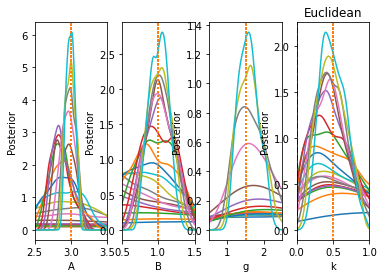

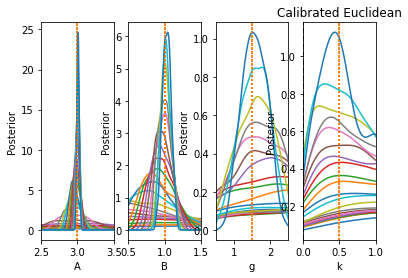

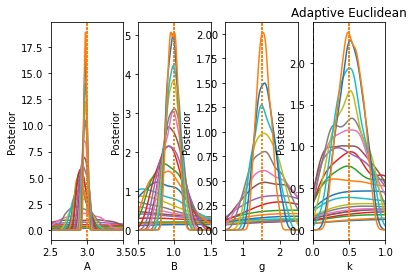

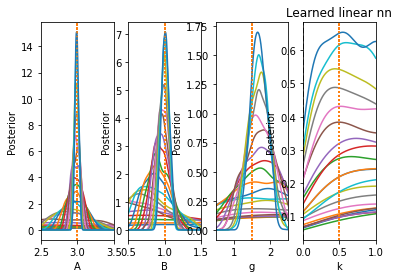

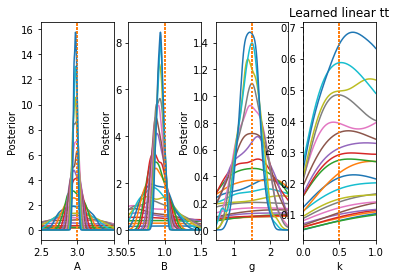

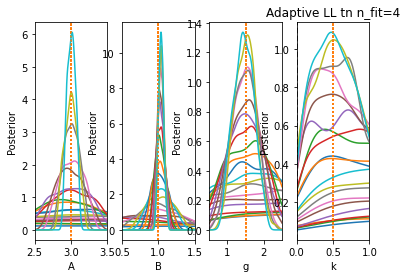

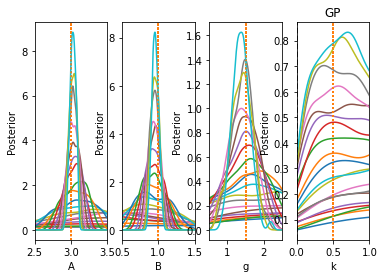

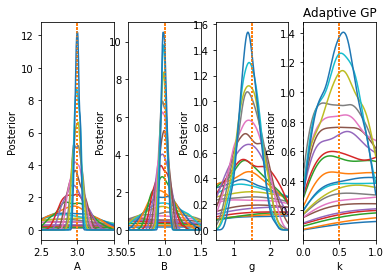

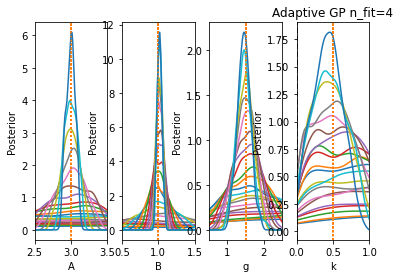

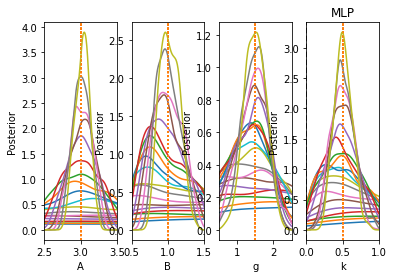

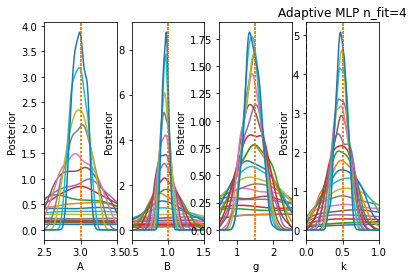

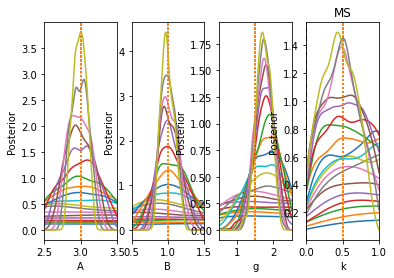

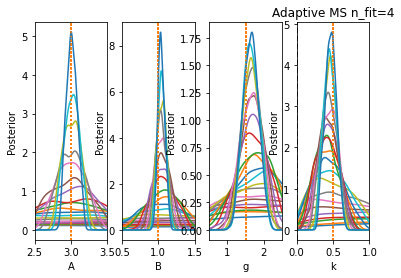

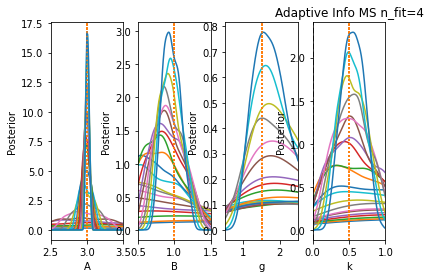

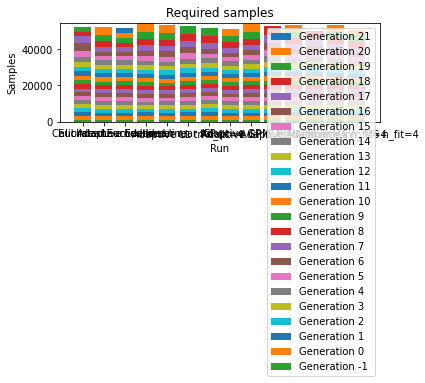

In [9]:
import matplotlib.pyplot as plt

sharp_bounds = {"A": (2.5, 3.5), "B": (0.5, 1.5), "g": (0.5, 2.5), "k": (0, 1)}

def plot_history(history: pyabc.History, label: str):
    gt_pars = problem.get_gt_par()
    prior_bounds = problem.get_prior_bounds()
    
    fig, ax = plt.subplots(1,len(gt_pars))
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        for ix, (par, (lb, ub)) in enumerate(sharp_bounds.items()):
            pyabc.visualization.plot_kde_1d(
                df, w, xmin=lb, xmax=ub, numx=300, refval=gt_pars,
                x=par, xname=par, ax=ax[ix],
                label="PDF t={}".format(t))
    ax[-1].axvline(0, color='k', linestyle='dashed', label="True value")
    #ax[-1].legend()
    ax[-1].set_title(label)

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

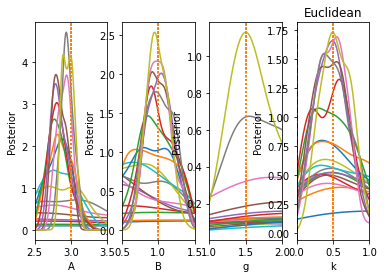

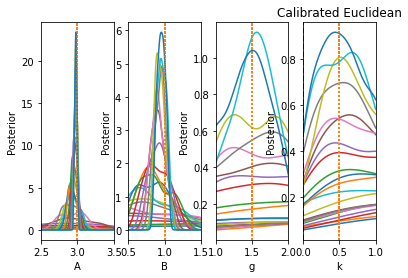

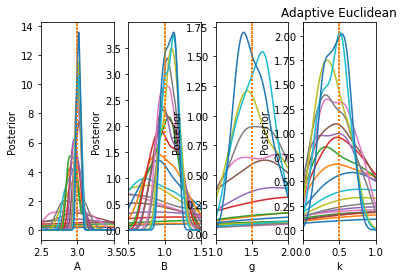

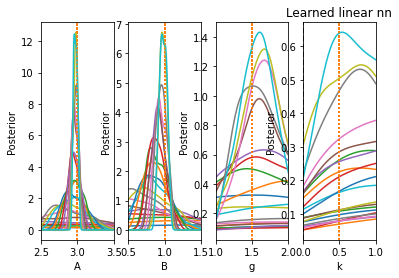

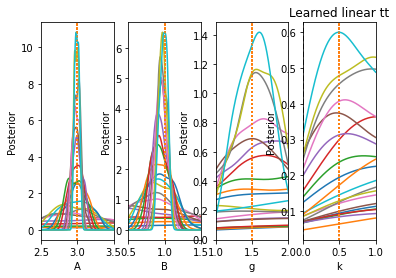

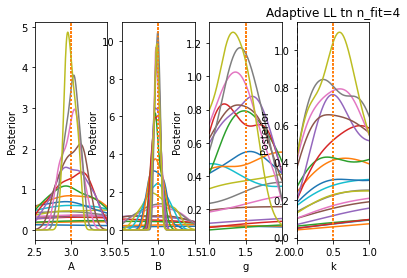

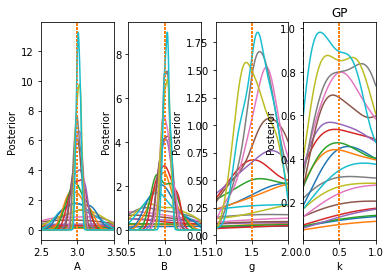

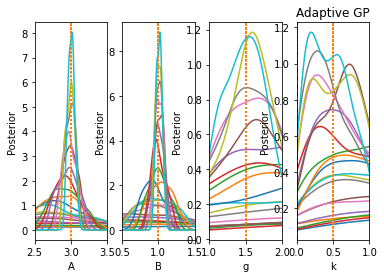

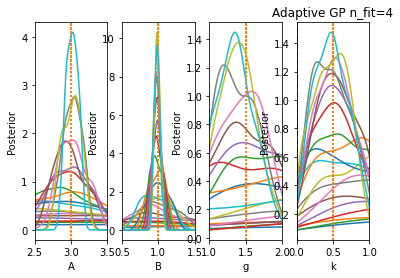

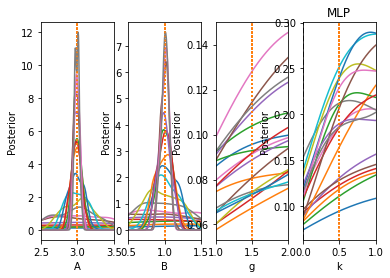

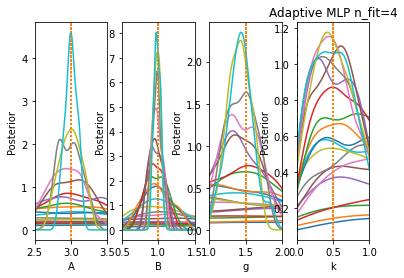

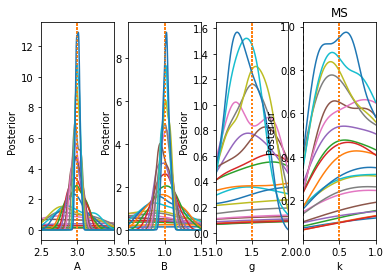

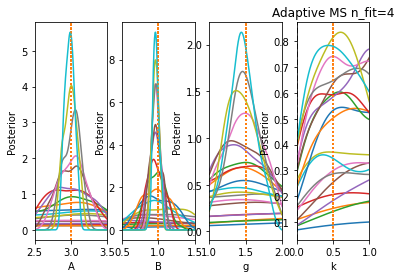

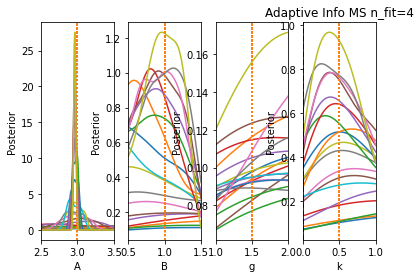

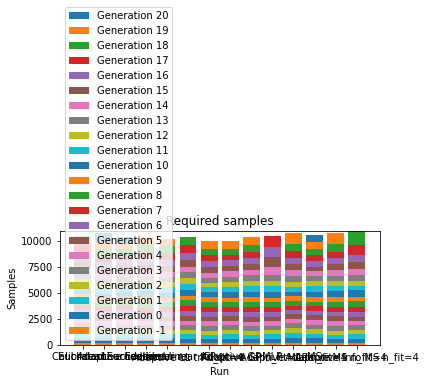

In [5]:
import matplotlib.pyplot as plt

sharp_bounds = {"A": (2.5, 3.5), "B": (0.5, 1.5), "g": (1.0, 2.0), "k": (0, 1)}

def plot_history(history: pyabc.History, label: str):
    gt_pars = problem.get_gt_par()
    prior_bounds = problem.get_prior_bounds()
    
    fig, ax = plt.subplots(1,len(gt_pars))
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        for ix, (par, (lb, ub)) in enumerate(sharp_bounds.items()):
            pyabc.visualization.plot_kde_1d(
                df, w, xmin=lb, xmax=ub, numx=300, refval=gt_pars,
                x=par, xname=par, ax=ax[ix],
                label="PDF t={}".format(t))
    ax[-1].axvline(0, color='k', linestyle='dashed', label="True value")
    #ax[-1].legend()
    ax[-1].set_title(label)

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

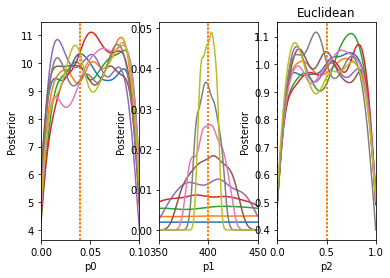

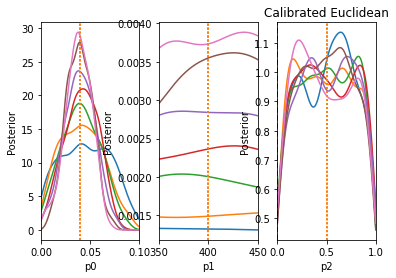

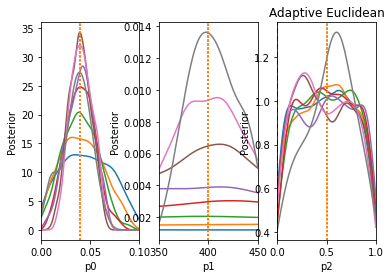

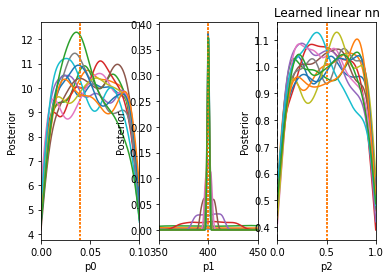

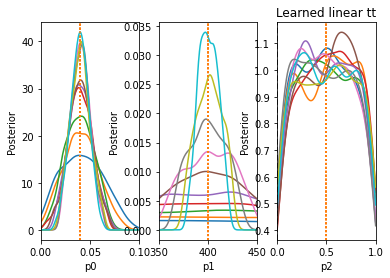

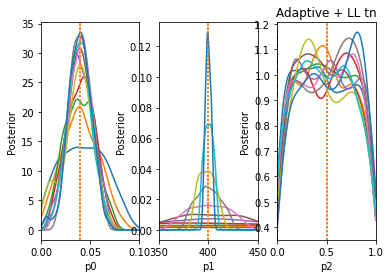

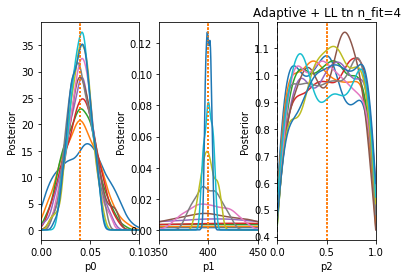

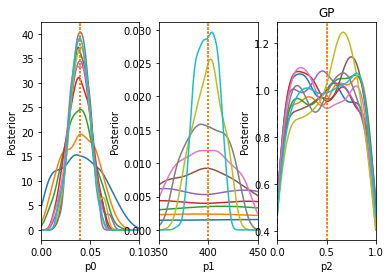

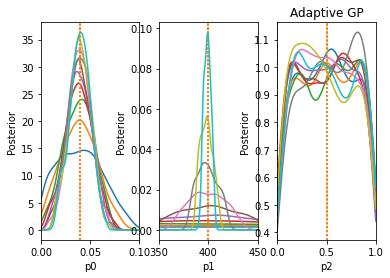

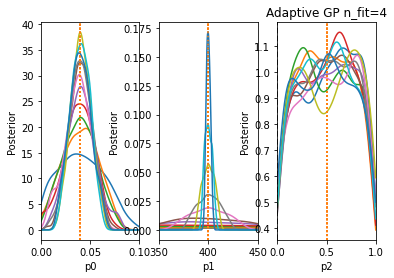

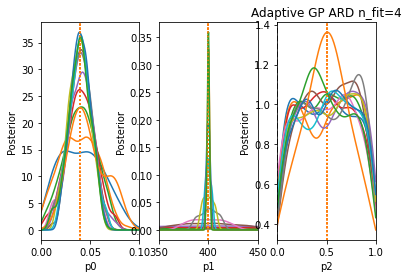

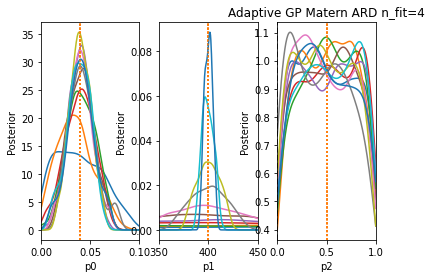

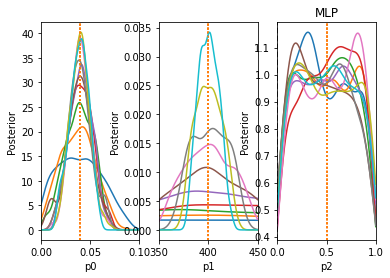

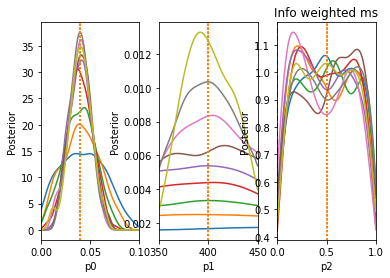

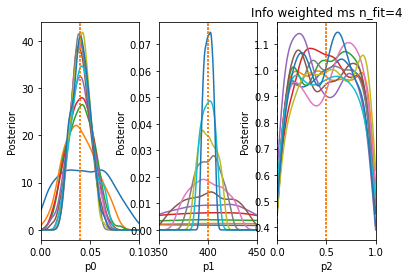

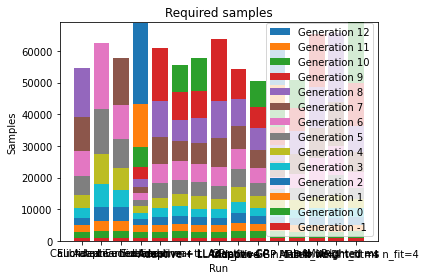

In [13]:
import matplotlib.pyplot as plt

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

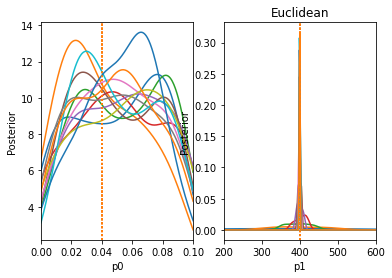

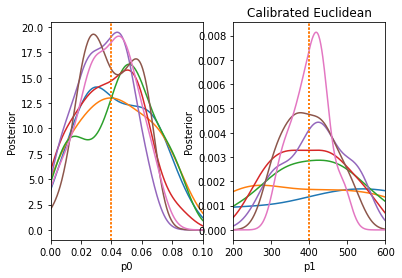

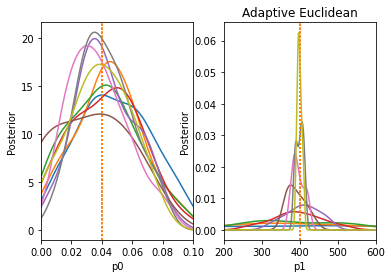

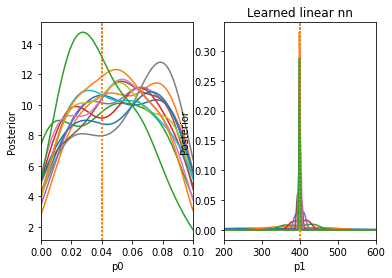

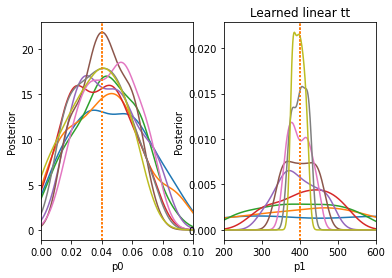

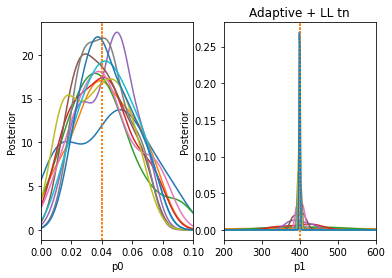

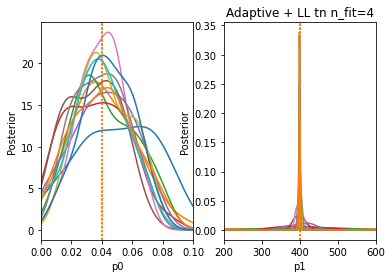

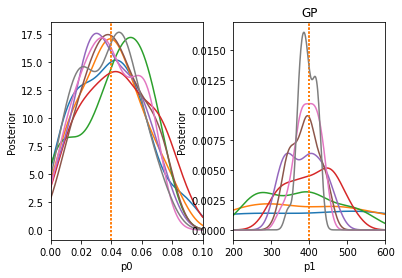

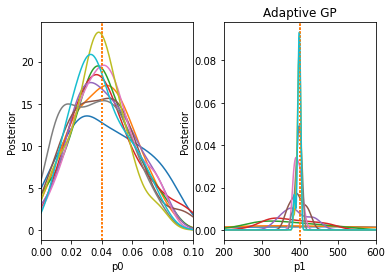

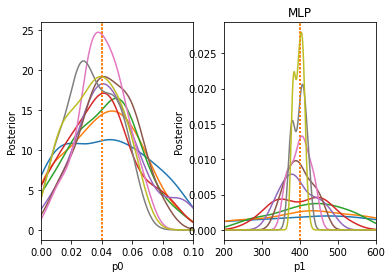

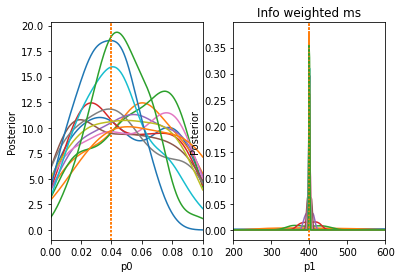

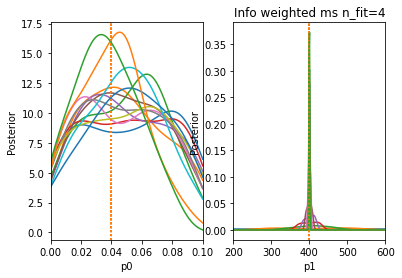

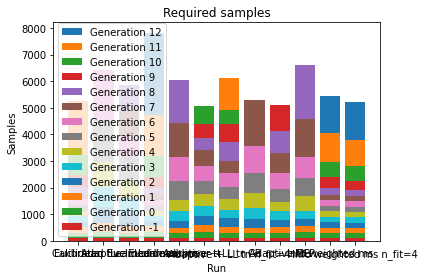

In [7]:
import matplotlib.pyplot as plt

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)